In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

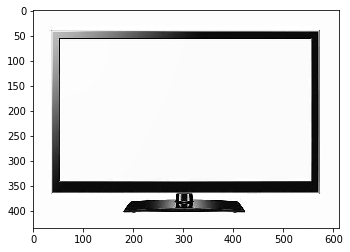

In [60]:
img = cv2.imread('tv.jpg')
img_copy = img.copy()
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_image, cmap = 'gray')

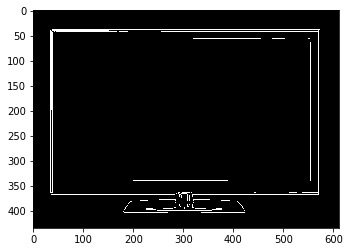

In [71]:
#apply canny filter
low = 200
high = 240
edges = cv2.Canny(gray_image, low, high)
plt.imshow(edges, cmap = 'gray')

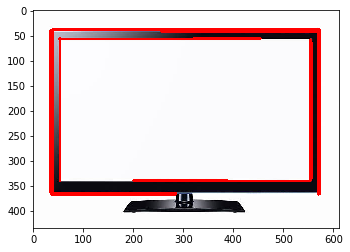

In [72]:
#apply hough transform
'''
edges, rho, theta, threshold, empty array, min_line_length, max_gap
'''
rho = 1
theta = np.pi/180
threshold = 50 
min_line_length = 125 #the minimum length to consider it a line; shorter lines will be discarded
max_line_gap = 5 #maximum gap between points 

#probabilistic hough lines
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]), min_line_length, max_line_gap)

image_lines = np.copy(rgb_img)
#for each line, draw the line on the original image
for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(image_lines, (x1,y1), (x2,y2), (255,0,0), 3)
        
plt.imshow(image_lines)
